# **Import the Library**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# **Upload the Data Set**

In [31]:
dfStudents= pd.read_csv('/content/StudentsPerformance.csv')
dfStudents.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **Preprocessing the Data**

In [32]:
dfStudents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Score **Correlations**

In [54]:
dfStudents.describe().T #transpose the data set
#dfStudents.describe()

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089000,15.163080,0.0,57.000000,66.000000,77.000000,100.0
reading score,1000.0,69.169000,14.600192,17.0,59.000000,70.000000,79.000000,100.0
writing score,1000.0,68.054000,15.195657,10.0,57.750000,69.000000,79.000000,100.0
total score,1000.0,203.312000,42.771978,27.0,175.000000,205.000000,233.000000,300.0
Average,1000.0,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0


In [33]:
rows, cols = dfStudents.shape
print(f'{rows} observaciones y {cols} características')

1000 observaciones y 8 características


In [34]:
dfStudents.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [35]:


def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')

    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]

        if not np.issubdtype(columnDf.dtype, np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()

        plt.ylabel('Cantidad de observaciones')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (columna {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()




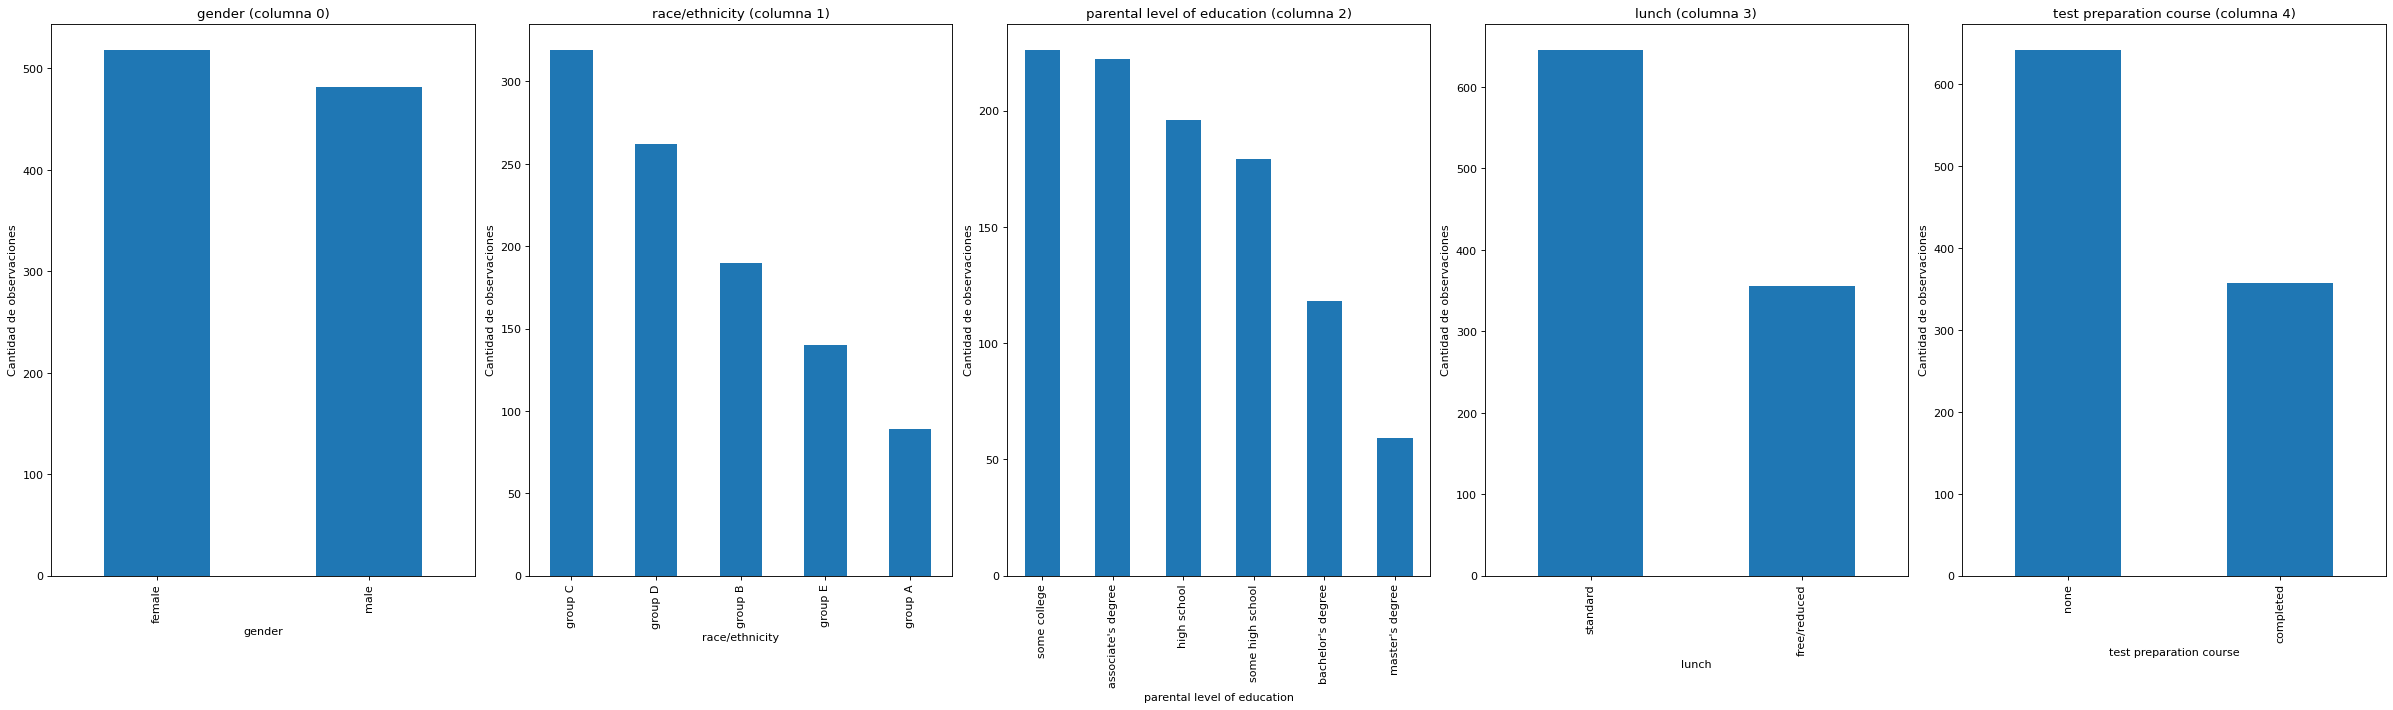

In [36]:
# Call the function with the dfStudents DataFrame
plotPerColumnDistribution(dfStudents, 10, 5)

# **Correlation** **Matrix**

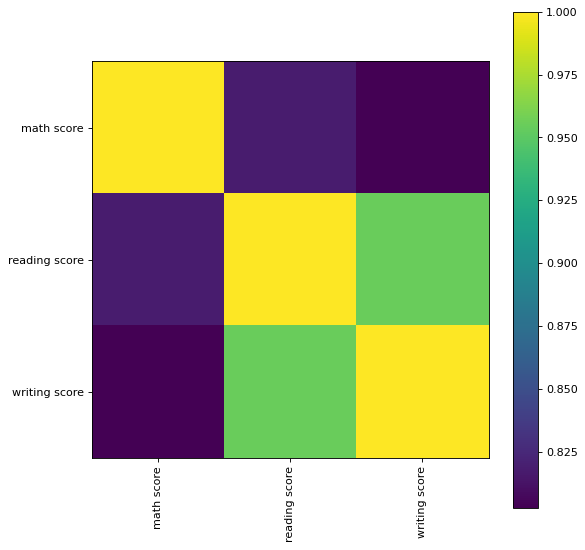

In [37]:
def plotCorrelationMatrix(df, graphWidth, filename=None):
    if filename:
        print(f'Creating correlation matrix for: {filename}')

    df = df.dropna(axis=1)  # Drop columns with NaN values
    df = df[[col for col in df if df[col].nunique() > 1]]  # Keep columns with more than one unique value

    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return

    corr = df.corr(numeric_only=True)  # Specify numeric_only=True to avoid the warning
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

# Call the function with the dfStudents DataFrame
plotCorrelationMatrix(dfStudents, 8)


# **Scatter** **plot** **Matrix**

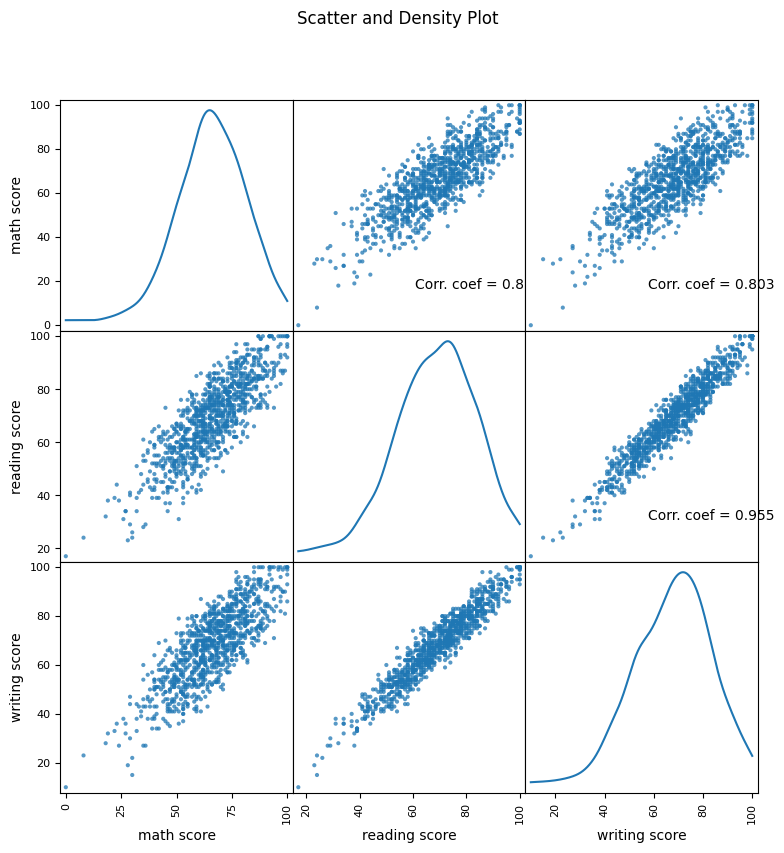

In [38]:


def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # Keep only numerical columns
    df = df.dropna(axis=1)  # Drop columns with NaN values
    df = df[[col for col in df if df[col].nunique() > 1]]  # Keep columns with more than one unique value

    columnNames = list(df)
    if len(columnNames) > 10:  # Reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]

    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values

    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)

    plt.suptitle('Scatter and Density Plot')
    plt.show()

# Example usage with a sample DataFrame
plotScatterMatrix(dfStudents, 9, 10)


In [39]:
dfStudents['total score'] = dfStudents['math score']+dfStudents['reading score']+dfStudents['writing score']
dfStudents['Average'] = dfStudents['total score']/3

In [40]:
dfStudents.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333




## **One** hot encoding de variables **categóricas**

In [41]:
dfStudents = pd.get_dummies(dfStudents, columns=['gender'])
dfStudents = pd.get_dummies(dfStudents, columns=['test preparation course'])
dfStudents = pd.get_dummies(dfStudents, columns=['race/ethnicity'])
dfStudents = pd.get_dummies(dfStudents, columns=['parental level of education'])
dfStudents = pd.get_dummies(dfStudents, columns=['lunch'])

In [42]:
dfStudents.head()

,math score,reading score,writing score,total score,Average,gender_female,gender_male,test preparation course_completed,test preparation course_none,race/ethnicity_group A,...,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard
0,72,72,74,218,72.666667,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
1,69,90,88,247,82.333333,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
2,90,95,93,278,92.666667,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,47,57,44,148,49.333333,False,True,False,True,True,...,False,False,True,False,False,False,False,False,True,False
4,76,78,75,229,76.333333,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [43]:
from sklearn.decomposition import PCA #(Principal Component Analysis)



In [44]:
dfSatander = pd.read_csv('/content/StudentsPerformance.csv')

In [45]:
rows, cols = dfSatander.shape
print(f'{rows} observaciones y {cols} características')

1000 observaciones y 8 características


In [46]:
# Assuming dfSatander is your DataFrame
# Sample DataFrame creation for demonstration purposes
np.random.seed(0)
dfSatander = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'feature4': np.random.rand(100),
    'feature5': np.random.rand(100),
    'feature6': np.random.rand(100),
    'feature7': np.random.rand(100),
    'feature8': np.random.rand(100),
    'feature9': np.random.rand(100),
    'feature10': np.random.rand(100),
    'feature11': np.random.rand(100)
})

# 1. Preprocess the data: Handle missing values and standardize features
dfSatander = dfSatander.dropna(axis=1)  # Drop columns with NaN values if any
features = dfSatander.select_dtypes(include=[np.number])  # Keep only numerical columns

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 2. Apply PCA
reducer = PCA(n_components=10)
dfSantanderReduced = reducer.fit_transform(features_scaled)

# 3. Print the shape of the reduced dataset
rows, cols = dfSantanderReduced.shape
print(f'{rows} observaciones y {cols} características')


100 observaciones y 10 características


In [47]:
reducer.explained_variance_ratio_.sum()

0.9491995397210075